In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from collections import defaultdict, Counter
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 先設定號col名稱
df = pd.DataFrame(columns = ["date", "num1", "num2", "num3", "num4", "num5"])
# 開始從第一頁爬到第48頁
for i in range(1, 49):
    r = requests.get("https://www.pilio.idv.tw/lto539/list539BIG.asp?indexpage=" + str(i) + "&orderby=new")
    r.encoding = 'utf-8'
    soup = BeautifulSoup(r.text, "html.parser")
    sel = soup.select("tr span")
    for j, s in enumerate(sel[2:]):
        if s["style"] == "font-size: 22px; font-weight: bold; color: #000000":
            dateStr = s.text.strip()[-10:]
            dt = datetime.datetime.strptime(dateStr, "%Y/%m/%d").date()
        if s["style"] == "font-size: 36px; font-weight: bold; color: #000000":
            numsStr = s.text.replace(" ", "").replace("\n", "")
            nums = numsStr.split()
            nums = [int(num[:2]) for num in nums]
        # 因為它每隔兩個才是我們要的資料
        if j % 2:
            dftmp = pd.DataFrame([[dt] + nums], columns = ["date", "num1", "num2", "num3", "num4", "num5"])
            df = pd.concat([df, dftmp], ignore_index = True)
# 將日期設為我們的index
df.set_index('date', inplace = True)

In [3]:
df

,num1,num2,num3,num4,num5
date,,,,,
2022-08-24,4,7,26,33,34
2022-08-23,5,8,12,15,24
2022-08-22,6,13,14,25,38
2022-08-20,11,13,29,31,35
2022-08-19,26,28,31,37,39
...,...,...,...,...,...
2007-01-05,9,12,13,15,26
2007-01-04,3,9,23,32,39
2007-01-03,22,23,27,29,30


In [4]:
# 儲存成CSV
df.to_csv('lotteryHistory.csv', index = False)

# 讀取CSV
# df2 = pd.read_csv('lotteryHistory.csv', index_col = "date")

In [5]:
arr = df.to_numpy()

In [6]:
unique, counts = np.unique(arr, return_counts=True)

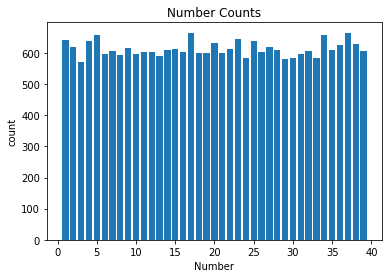

In [7]:
# 每個數字的出現情形輸出成長條圖
plt.bar(unique, counts)
plt.title("Number Counts")
plt.xlabel("Number")
plt.ylabel("count")
plt.show()

In [8]:
print("max count : ", np.max(counts))
print("min count : ", np.min(counts))

max count :  665
min count :  570


In [9]:
# 五個數字組合
# key為組合, val為次數
hm = defaultdict(int)
for row in arr:
    hm[tuple(row)]+=1

# 查看出現最高次數
maxFreq = 0
maxComb = set()
for combo, freq in hm.items():
    if freq > maxFreq:
        maxFreq = freq
        maxCombo = combo
print("maxCombo :", maxCombo)
print("maxFreq  :",maxFreq)
print("Average frequency :", np.array(list(hm.values())).mean())

maxCombo : (14, 18, 26, 28, 36)
maxFreq  : 3
Average frequency : 1.0246410970644955


In [10]:
# 四個數字組合
# key為組合, val為次數
hm = defaultdict(int)
for row in arr:
    for s in combinations(row, 4):
        hm[s]+=1

# 查看出現最高次數
maxFreq = 0
maxComb = set()
for combo, freq in hm.items():
    if freq > maxFreq:
        maxFreq = freq
        maxCombo = combo
print("maxCombo :", maxCombo)
print("maxFreq  :",maxFreq)
print("Average frequency :", np.array(list(hm.values())).mean())

maxCombo : (22, 23, 27, 29)
maxFreq  : 5
Average frequency : 1.174823113207547


In [11]:
# 三個數字組合
# key為組合, val為次數
hm = defaultdict(int)
for row in arr:
    for s in combinations(row, 3):
        hm[s]+=1

# 查看出現最高次數
maxFreq = 0
maxComb = set()
for combo, freq in hm.items():
    if freq > maxFreq:
        maxFreq = freq
        maxCombo = combo
print("maxCombo :", maxCombo)
print("maxFreq  :",maxFreq)
print("Average frequency :", np.array(list(hm.values())).mean())

maxCombo : (10, 12, 34)
maxFreq  : 16
Average frequency : 5.260147398526015
